In [1]:
import torch

In [2]:
def synthetic_data(w,b,num):
    X = torch.normal(0,1,(num,len(w)))
    Y = torch.matmul(X,w)+b
    Y += torch.normal(0,0.01,Y.shape)
    return X,Y.reshape([-1,1])

true_w = torch.tensor([3.2,2.5])
true_b = 3.2

features, labels = synthetic_data(true_w,true_b,100)

In [3]:
import matplotlib.pyplot as plt

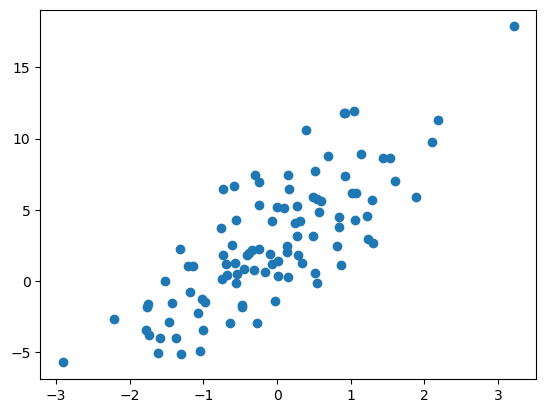

In [4]:
with torch.no_grad():
    plt.scatter(features[:,0].reshape(labels.shape),labels)

In [5]:
from torch.utils.data import DataLoader,TensorDataset
def load_array(data_arrays,batch_size,is_train=True):
    dataset = TensorDataset(*data_arrays)
    return DataLoader(dataset,batch_size,shuffle=is_train)

In [6]:
def train(net,optimizer,loss,data_iter,epochs):
    loss_table = []
    for epoch in range(epochs):
        for X,y in data_iter:
            l = loss(net(X),y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        with torch.no_grad():
            current_loss = loss(net(X),y)
            loss_table.append(current_loss.mean())
            #print(current_loss.mean())
    return loss_table

In [7]:
data_iter = load_array((features,labels),10)

In [8]:
net = torch.nn.Sequential(torch.nn.Linear(features.shape[1],labels.shape[1]))

In [9]:
torch.nn.init.xavier_normal_(net[0].weight)
net[0].bias.data.fill_(0)
print(net[0].weight.data)

tensor([[0.9174, 0.4890]])


In [10]:
optimizer = torch.optim.SGD(net.parameters(),0.01)
loss = torch.nn.MSELoss()

In [11]:
epochs = 50
loss_table = train(net,optimizer,loss,data_iter,epochs)

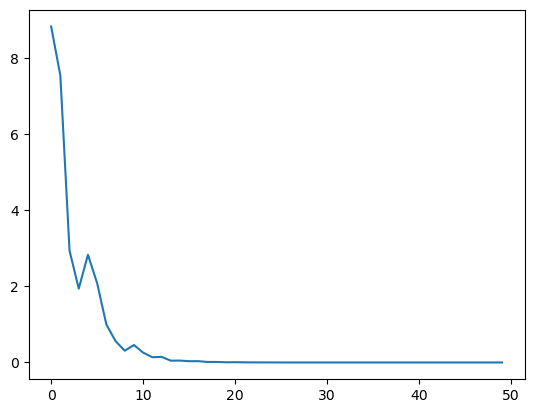

In [12]:
epoches = list(range(len(loss_table)))
plt.plot(epoches,loss_table)

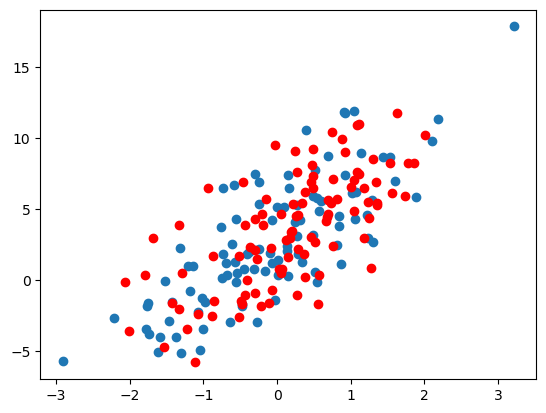

In [13]:
new_features = torch.normal(0,1,[100,2])
predict = net(new_features)
plt.scatter(features[:,0].reshape(labels.shape),labels)
plt.scatter(new_features[:,0].reshape(labels.shape),predict.detach(),c='red')